In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Real_estate.csv')
df.head(20)


,House No.,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


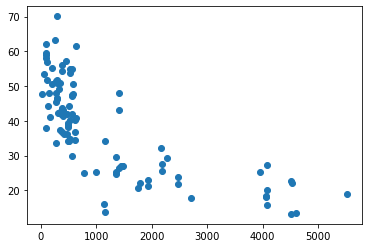

In [2]:
df = df.head(100)
plt.scatter(x=df['X3 distance to the nearest MRT station'],y=df['Y house price of unit area'])

In [3]:
import seaborn as sns
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

<AxesSubplot:>

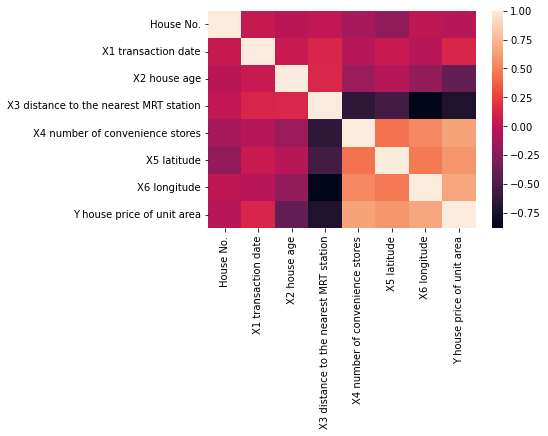

In [4]:
sns.heatmap(df.corr())

In [5]:
df = df[['House No.','X3 distance to the nearest MRT station','Y house price of unit area']]

df.head()

,House No.,X3 distance to the nearest MRT station,Y house price of unit area
0,1,84.87882,37.9
1,2,306.59470,42.2
2,3,561.98450,47.3
3,4,561.98450,54.8
4,5,390.56840,43.1


In [6]:
X = df.iloc[ : , 1: 2 ].values
Y = df.iloc[ : , 2 ].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0) 

In [7]:
X.shape

(100, 1)

In [8]:
Y.shape

(100,)

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

In [10]:
Y_pred = regressor.predict(X_test)

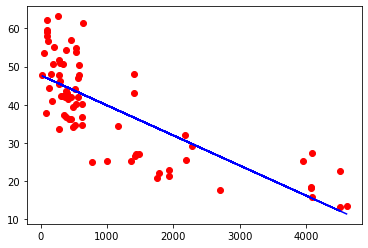

In [11]:
plt.scatter(X_train , Y_train, color = 'red')
plt.plot(X_train , regressor.predict(X_train), color ='blue')

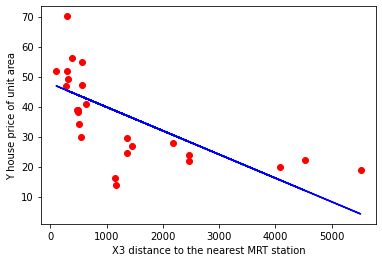

In [12]:
plt.scatter(X_test , Y_test, color = 'red')
plt.xlabel('X3 distance to the nearest MRT station')
plt.ylabel('Y house price of unit area')
plt.plot(X_test , regressor.predict(X_test), color ='blue')


In [13]:
Score=regressor.score(X_test,Y_test)

In [14]:
df

,House No.,X3 distance to the nearest MRT station,Y house price of unit area
0,1,84.87882,37.9
1,2,306.59470,42.2
2,3,561.98450,47.3
3,4,561.98450,54.8
4,5,390.56840,43.1
...,...,...,...
95,96,104.81010,51.8
96,97,90.45606,59.5
97,98,617.44240,34.6
98,99,289.32480,51.0


In [15]:
score = regressor.score(X_test , Y_pred)

In [16]:
score

1.0

In [17]:
X_train

array([[4605.749  ],
       [ 623.4731 ],
       [  90.45606],
       [ 150.9347 ],
       [ 616.4004 ],
       [1931.207  ],
       [ 533.4762 ],
       [ 274.0144 ],
       [ 464.223  ],
       [1758.406  ],
       [ 276.449  ],
       [ 368.1363 ],
       [ 371.2495 ],
       [ 533.4762 ],
       [ 379.5575 ],
       [ 306.5947 ],
       [ 259.6607 ],
       [ 519.4617 ],
       [4066.587  ],
       [ 390.5684 ],
       [ 579.2083 ],
       [ 350.8515 ],
       [4082.015  ],
       [ 577.9615 ],
       [2175.03   ],
       [1402.016  ],
       [ 336.0532 ],
       [  84.87882],
       [ 205.367  ],
       [ 557.478  ],
       [ 512.5487 ],
       [  90.45606],
       [4079.418  ],
       [ 279.1726 ],
       [1438.579  ],
       [ 405.2134 ],
       [ 769.4034 ],
       [ 193.5845 ],
       [  56.47425],
       [1414.837  ],
       [ 338.9679 ],
       [ 488.5727 ],
       [ 383.2805 ],
       [1164.838  ],
       [3947.945  ],
       [  23.38284],
       [ 451.2438 ],
       [4510.

In [18]:
Y_test

array([56.2, 27. , 47.3, 13.7, 29.5, 16.1, 70.1, 20. , 51.7, 51.8, 38.9,
       21.8, 29.8, 23.8, 46.7, 22.1, 24.6, 38.8, 49.3, 18.8, 34.1, 27.7,
       54.8, 40.8, 38.3])

In [19]:

Y_pred = np.round(Y_pred, 2)

In [20]:
Y_pred

array([44.69, 36.23, 43.29, 38.56, 36.99, 38.67, 45.41, 15.5 , 45.44,
       46.9 , 43.84, 28.23, 43.36, 28.23, 45.45, 12.05, 36.99, 43.93,
       45.17,  4.21, 43.68, 30.55, 43.29, 42.67, 43.86])

In [21]:
data_set_out = pd.DataFrame({'Y_test':Y_test,'Y_pred':Y_pred},columns=('Y_test','Y_pred'))

In [22]:
data_set_out.corr()

,Y_test,Y_pred
Y_test,1.000000,0.648787
Y_pred,0.648787,1.000000


<AxesSubplot:>

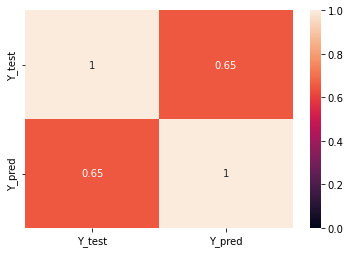

In [23]:
sns.heatmap(data_set_out.corr(),vmin=0,vmax=1,annot=True)

In [24]:
Score = regressor.predict(np.array([2469]).reshape(1, -1))

In [25]:
Score

array([28.23457799])

In [26]:
import sklearn.metrics as metrics
import math
mse = metrics.mean_squared_error(Y_pred, Y_test)
print("Mean Squared Error {}".format(math.sqrt(mse)))

Mean Squared Error 11.240421522345148


In [27]:
Y_pred

array([44.69, 36.23, 43.29, 38.56, 36.99, 38.67, 45.41, 15.5 , 45.44,
       46.9 , 43.84, 28.23, 43.36, 28.23, 45.45, 12.05, 36.99, 43.93,
       45.17,  4.21, 43.68, 30.55, 43.29, 42.67, 43.86])

In [28]:
Y_test

array([56.2, 27. , 47.3, 13.7, 29.5, 16.1, 70.1, 20. , 51.7, 51.8, 38.9,
       21.8, 29.8, 23.8, 46.7, 22.1, 24.6, 38.8, 49.3, 18.8, 34.1, 27.7,
       54.8, 40.8, 38.3])